In [51]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import ast
import chromoscores.maputils as chrmap
import chromoscores.scorefunctions as chrsco

To extract the average properties of a feature in a Hi-C map, we can make a summation of the snippets with specified feature (e.g., TADs). In this notebook we showed the usage of offdiagonal pile-up functions for the analysis of peak score. 

### Loading simulated data

In [10]:
path_dict = {}

directory='/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_b/'


samples=['LIFETIME_50_SEPARATION_100_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000',
       'LIFETIME_50_SEPARATION_150_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_0.33_Tad_1000',
       'LIFETIME_50_SEPARATION_100_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_3_Tad_1000']


In [45]:
#List of the position of boundary elements on the main diagonal. 

right_boundary_list=[15, 50,115, 175,519,670,830,1100,1180,1270,1350,1430]

left_boundary_list=[40,70,135,275,510,650,730,870,1185,1240,1330,1390]

lst=right_boundary_list+left_boundary_list
lst=np.sort(lst)
lst=np.unique(lst)

---

### Piling up

In this section we applied off-diagonal pile ups to investigate the overal characteristics of peaks respect to their distance from the main diagonal.

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


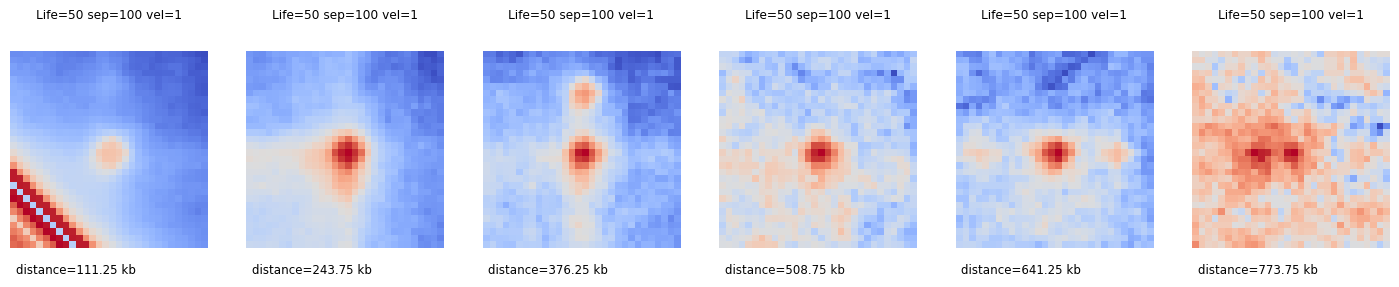

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


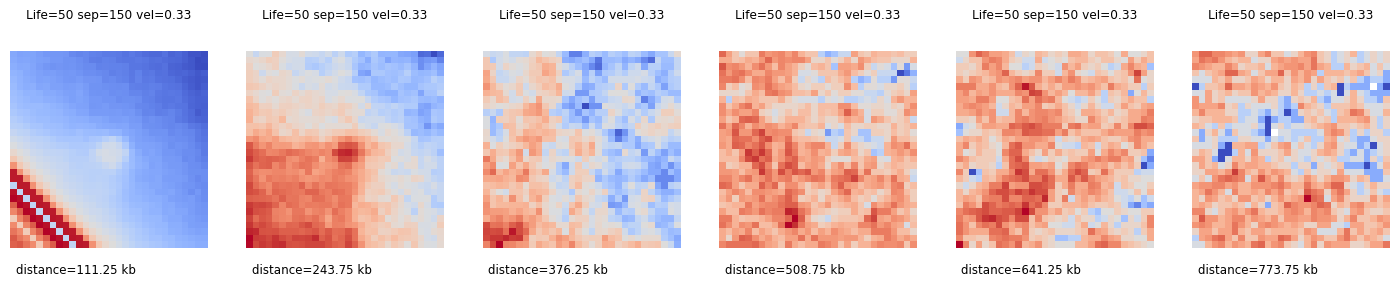

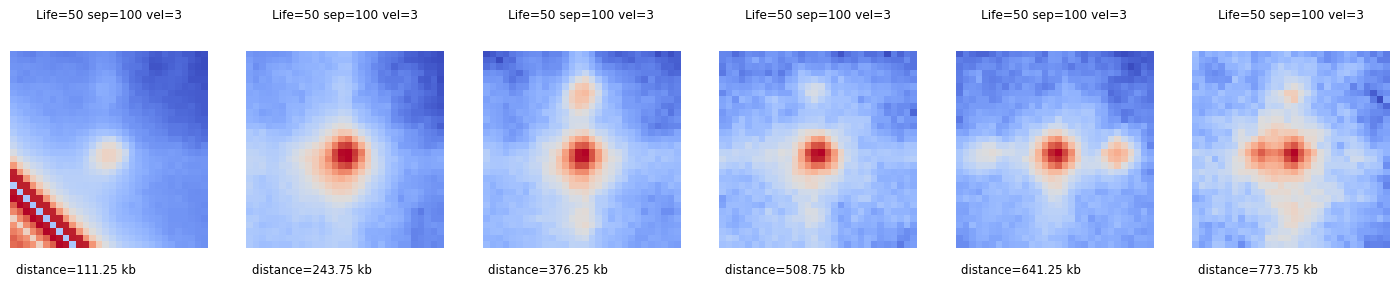

In [43]:
for name in samples:
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad=params
    
    #importing saved maps as matrices 
    data = np.load(directory+'maps/%s.npz'%name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    pile=chrmap.get_offdiagonal_pileup(mrc,lst,18,390, 6,30)
    
    
    #figure characteristics
    subplot_width = 3
    numx,numy = 10,3
    plt.figure(figsize=(subplot_width*numx,subplot_width*numy))
    c=0
    subplot_width = 3
    
    for i in range(6):
        c+=1
        #pseudo_count=(1/np.sum(pile[i][1]))
        #peakscore=peak_score(pile[i][1],3,10,pseudo_count=pseudo_count)
        #print(peakscore)
        plt.subplot(numy,numx, c)
        plt.matshow(np.log10(pile[i][1]), cmap='coolwarm',fignum=False);
        plt.title('Life=%s sep=%s vel=%s'%(Lifetime,separation,velocity),fontsize=8.75)
        plt.axis('off')
        plt.text(.35,33.5,'distance=%s kb'%(pile[i][0]*(2.5)),fontsize=8.5)
    plt.show()

### Peak score analysis

Then, we can use scorefunctions in chromoscore to calculate peak score:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


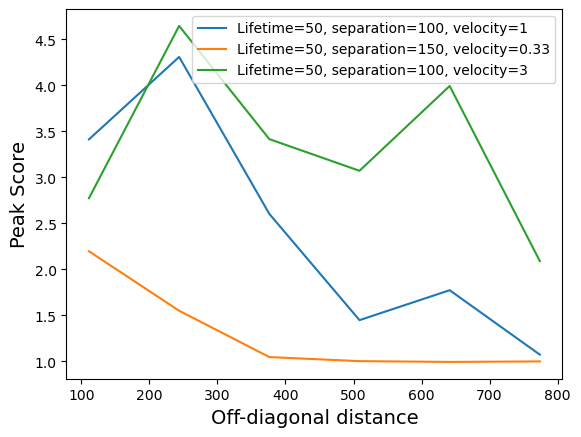

In [53]:
for name in samples:
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad=params
    
    #importing saved maps as matrices 
    data = np.load(directory+'maps/%s.npz'%name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    pile=get_offdiagonal_pileup(mrc,lst,18,390, 6,30)
    
    
    
    #getting peak scores as a function of offdiagonal distance
    scores=[]
    for i in range(6):
        c+=1
        pseudo_count=(1/np.sum(pile[i][1]))
        peakscore=chrsco.peak_score(pile[i][1],3,10,pseudo_count=pseudo_count)
        scores.append([(pile[i][0]*(2.5)),peakscore])
    scores=np.array(scores)
    plt.plot(scores[:,0],scores[:,1],label='Lifetime=%s, separation=%s, velocity=%s'%(Lifetime,separation,velocity))
    
    
plt.ylabel('Peak Score',fontsize=14)
plt.xlabel('Off-diagonal distance',fontsize=14)
plt.legend()
plt.show()